# Audio processing

A typical audio signal can be expressed as a function of Amplitude and Time.

![sound_wave](./Images/sound_wave.png)

<br>

![sound_wave_3d](./Images/sound_wave_3d.png)

<br>

Sound formats:

- mp3

- wma (windows media audio)

- wav (waveform audio file)

<br>

Audio libraries:

- Librosa

- PyAudio

- built-in modules

In [ ]:
import IPython.display as ipd

audio_test_path = './rock.00000.wav'

# Play audio input
ipd.Audio(audio_test_path)

**Waveform** - audio signal visualization

Sample rate: 22050Hz
Total samples: 661794
Audio length: 30.013333333333332


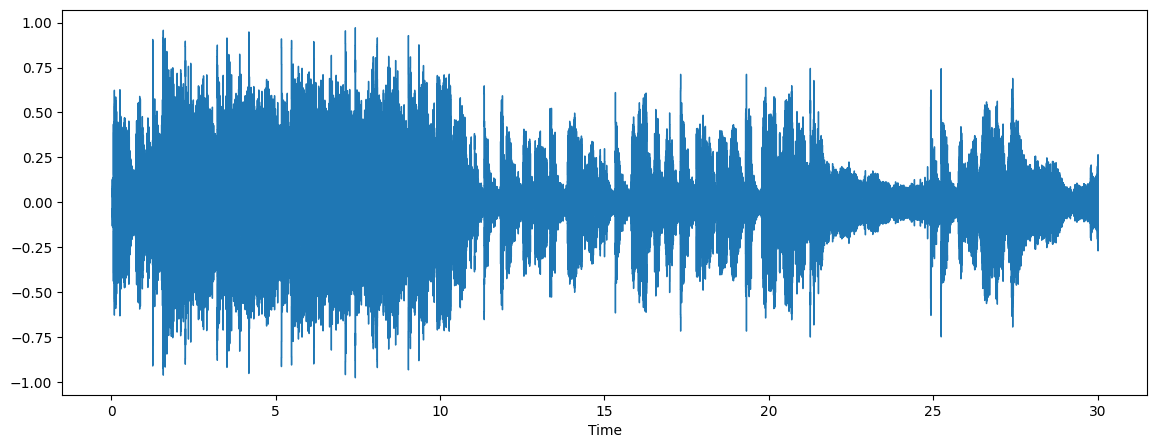

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

x, sr = librosa.load(audio_test_path)

print(f'Sample rate: {sr}Hz')
print(f'Total samples: {len(x)}')
print(f'Audio length: {len(x)/sr}')

plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

**MFCCs**

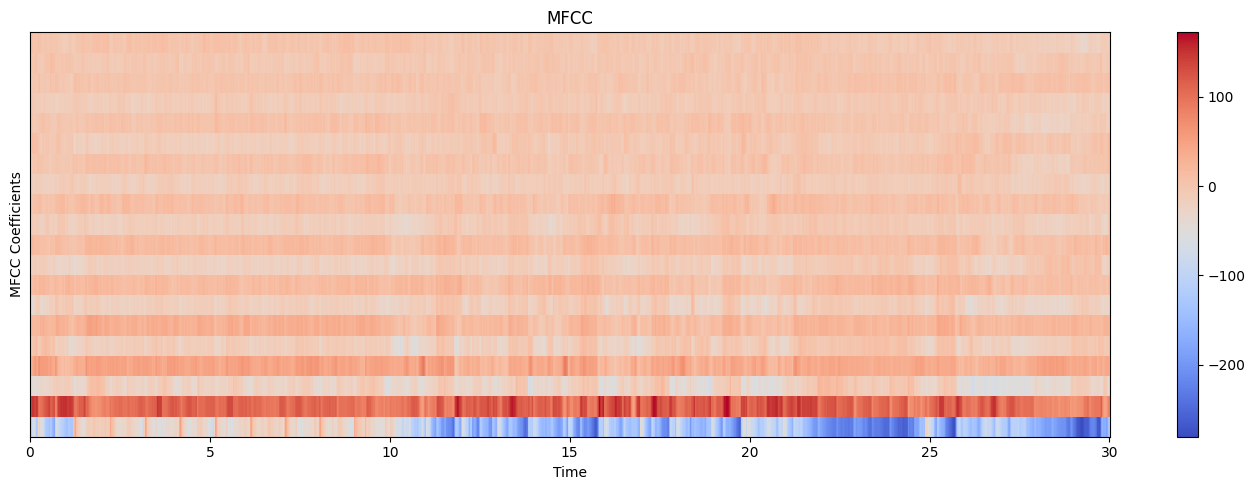

In [ ]:
mfccs = librosa.feature.mfcc(y=x, sr=sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()

**Spectrogram/sonograph/voiceprint/voicegram** - visual representation of the spectrum of frequencies of sound as they vary with time






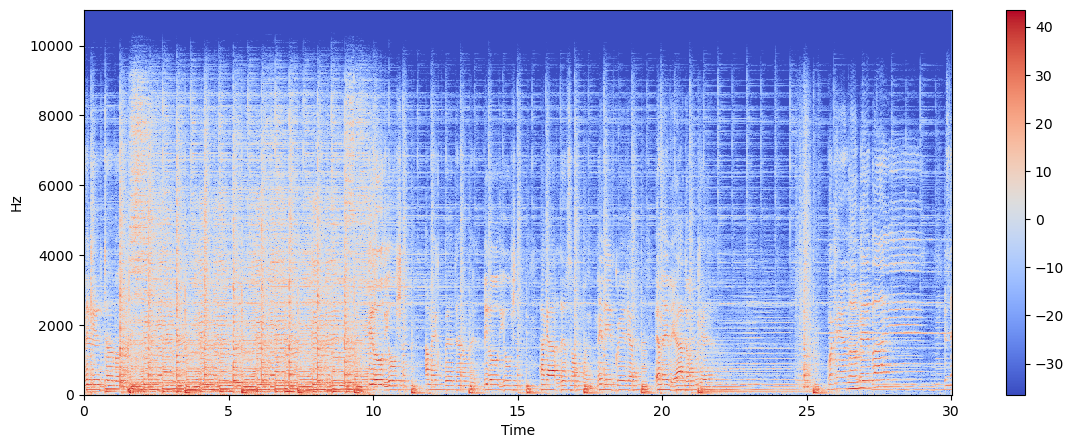

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))

librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

The vertical axis shows frequencies (from 0 to 10kHz), and the horizontal axis shows the time of the clip. 

All action is taking place at the bottom of the spectrum => convert the frequency axis to a logarithmic one.

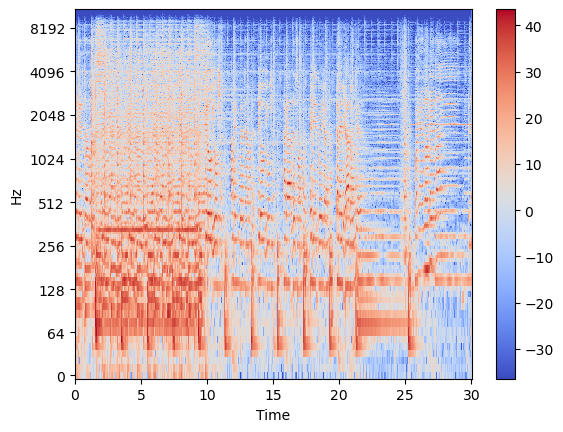

In [ ]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

+ **Mel Spectrogram**

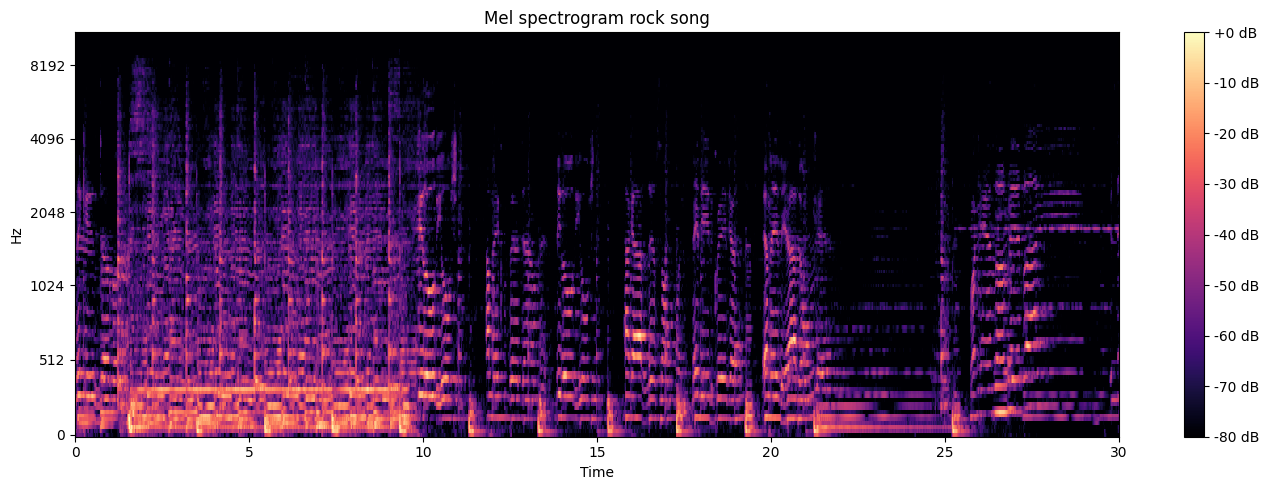

In [ ]:
S = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128)

# convert to log scale (dB)
log_S = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize=(14, 5))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('Mel spectrogram rock song')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()
plt.show()

### **GTZAN dataset** - the MNIST of sounds

A collection of 10 genres with 100 audio files each, all having a length of 30 seconds

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import os
import cv2
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
print('The genres used for classification:')
print(list(os.listdir('./Data/genres_original/')))

The genres used for classification:
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


### Audio features:

1. **Low-level**: basic properties of an audio signal, such as amplitude, frequency and spectral content
    
    - RMS energy

    - zero crossing rate

    - spectral centroid

2. **Mid-level**: more complex characteristics, like rhythm, tempo and tonality

    - beat histogram

    - chroma vector

    - MFCCs

3. **High-level**: abstract, semantic aspects, such as genre, mood or emotional content

    - lyrics

    - song structure

    - chords

In [ ]:
# Clear matplotlib open plots
plt.close('all')

Some of the audio features used in the dataset:

+ Tempogram

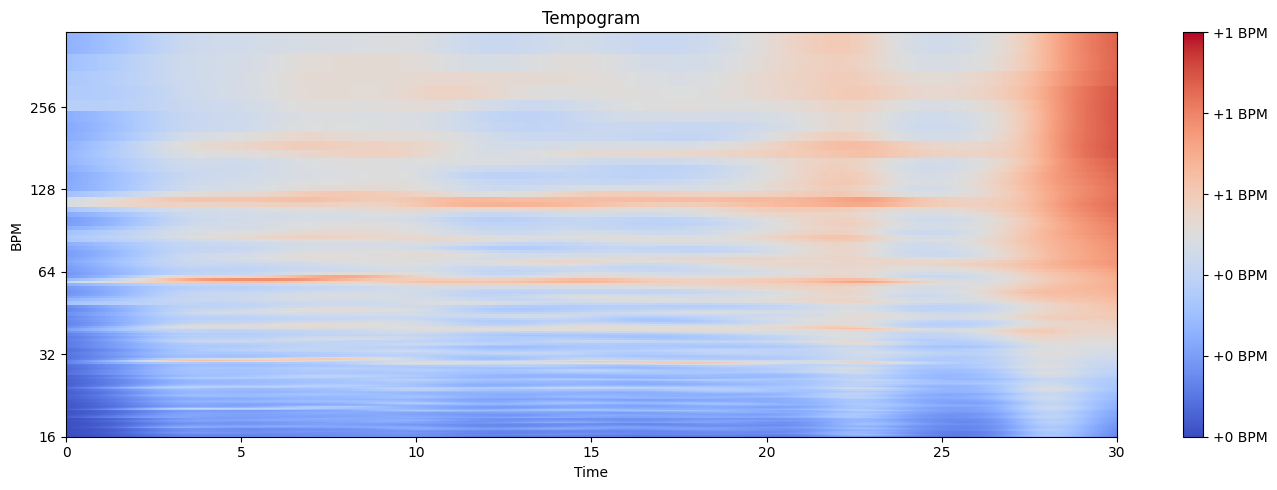

In [ ]:
# local autocorrelation of the onset strength envelope
oenv = librosa.onset.onset_strength(y=x, sr=sr)
tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(tempogram, sr=sr, x_axis='time', y_axis='tempo')
plt.colorbar(format='%+2.0f BPM')
plt.title('Tempogram')
plt.tight_layout()
plt.show()

+ Chromagram

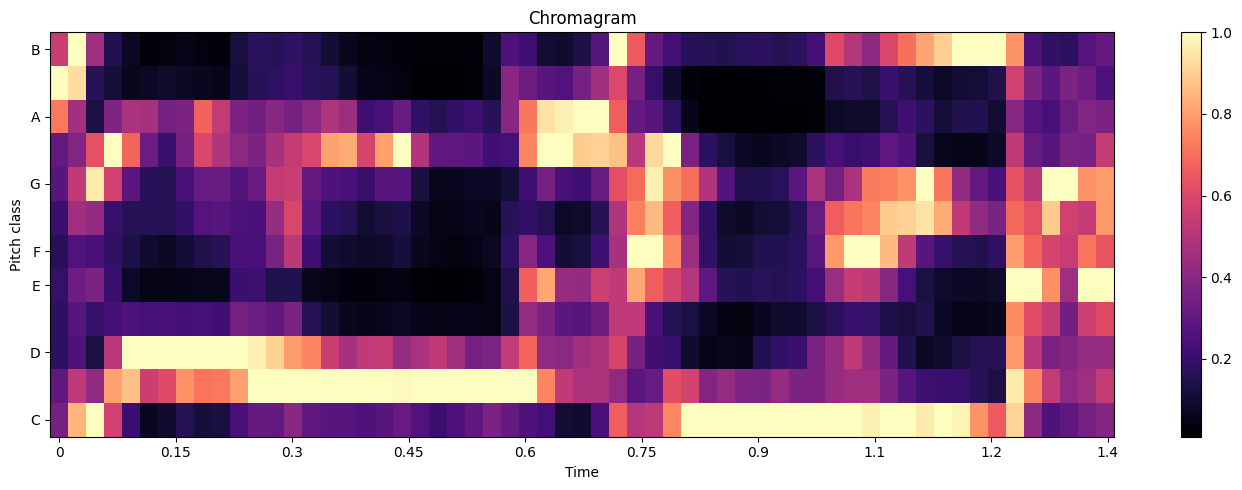

In [ ]:
chroma = librosa.feature.chroma_stft(y=x[:30000], sr=sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()

+ Zero Crossing Rate

    - = the rate of sign-changes along with a signal (from positive to negative or back)

    - it has higher values for highly percussive sounds like those in metal and rock

8


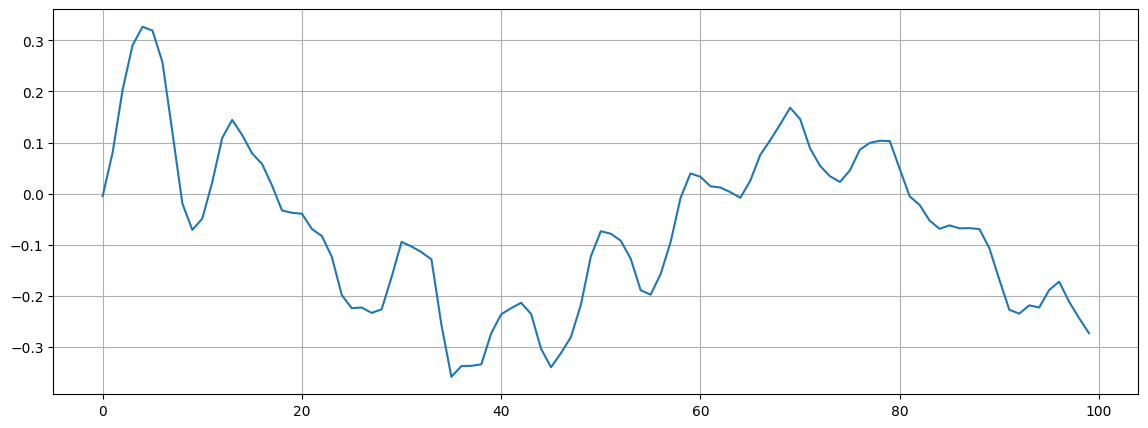

In [ ]:
# Check zero crossings visually:
plt.figure(figsize=(14, 5))
plt.plot(x[9000:9100])
plt.grid()

# Check zero crossings with `librosa`:
zero_crossings = librosa.zero_crossings(x[9000:9100], pad=False)
print(sum(zero_crossings))

+ Spectral Centroid

    - indicates where the 'center of mass' for a sound is located 

    - computed as the weighted mean of the frequencies present in the sound

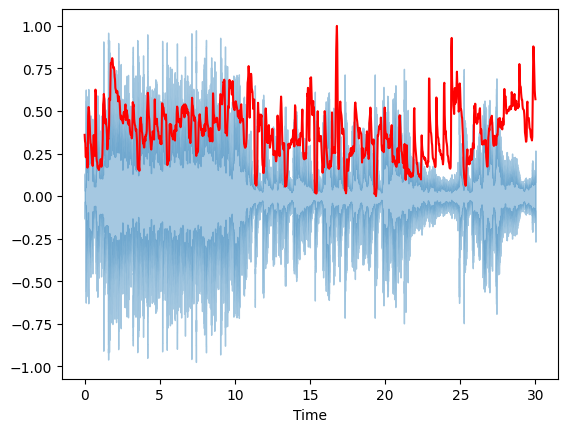

In [ ]:
spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]

# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return preprocessing.minmax_scale(x, axis=axis)

# Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

+ Spectral bandwidth

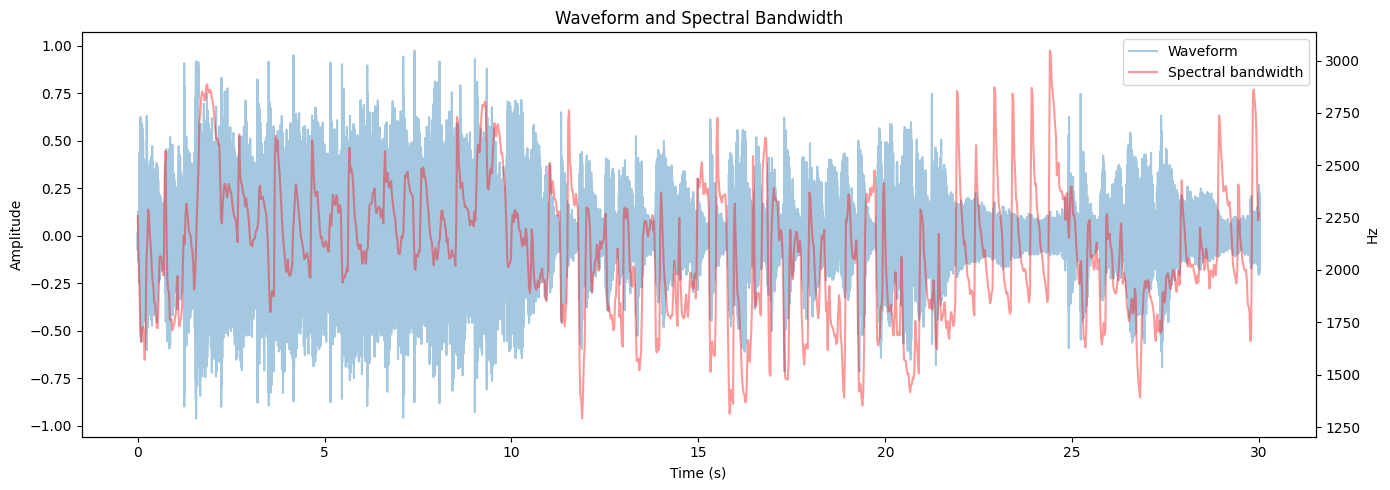

In [ ]:
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=x, sr=sr)

# time variable for spectral_bandwidth
t_spec_band = librosa.times_like(spectral_bandwidth)

#  time variable for waveform
t_wave = np.linspace(0, len(x)/sr, len(x))

plt.figure(figsize=(14, 5))

ax1 = plt.gca()
ax1.plot(t_wave, x, alpha=0.4, label='Waveform')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')

ax2 = ax1.twinx()
ax2.plot(t_spec_band, spectral_bandwidth[0], alpha=0.4, color='r', label='Spectral bandwidth')
ax2.set_ylabel('Hz')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.title('Waveform and Spectral Bandwidth')
plt.tight_layout()
plt.show()

+ RMS

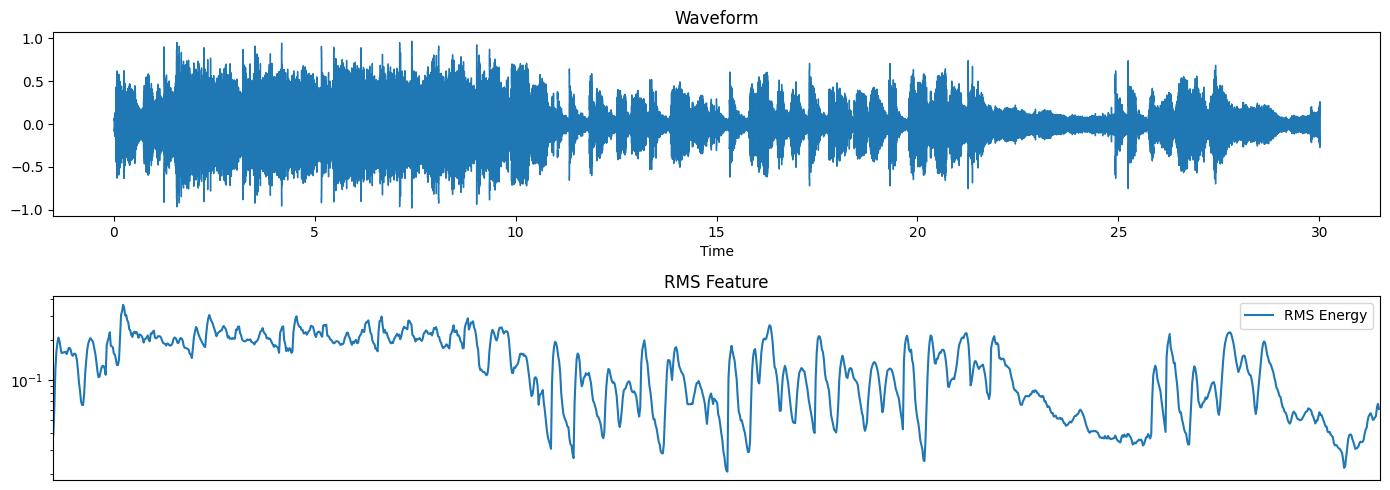

In [ ]:
rms = librosa.feature.rms(y=x)

plt.figure(figsize=(14, 5))
plt.subplot(2, 1, 1)
librosa.display.waveshow(x, sr=sr)
plt.title('Waveform')

plt.subplot(2, 1, 2)
plt.semilogy(rms.T, label='RMS Energy')
plt.xticks([])
plt.xlim([0, rms.shape[-1]])
plt.legend(loc='best')
plt.title('RMS Feature')
plt.tight_layout()
plt.show()

+ Spectral flatness

In [ ]:
sr

22050

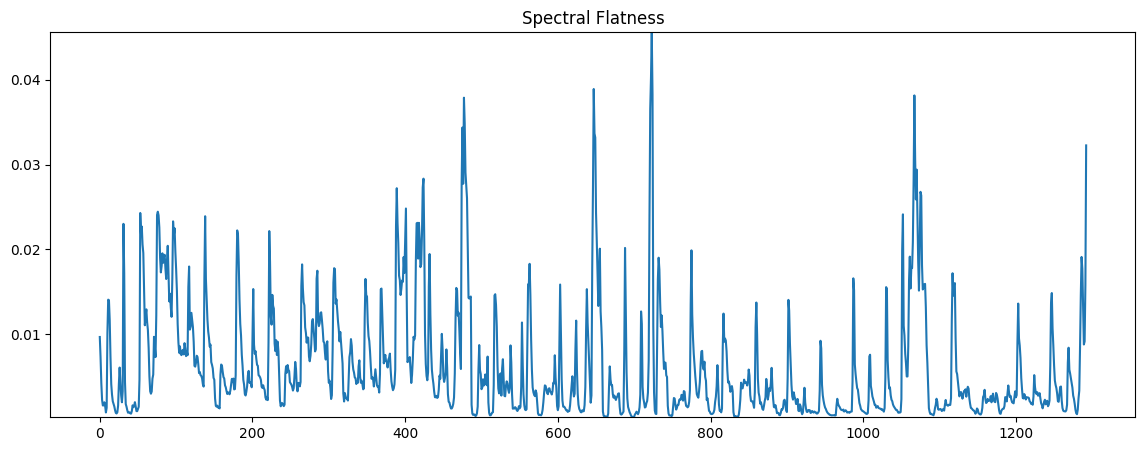

In [ ]:
flatness = librosa.feature.spectral_flatness(y=x)

plt.figure(figsize=(14, 5))
plt.plot(flatness[0])
plt.ylim([min(flatness[0]),max(flatness[0])])  
plt.title('Spectral Flatness')
plt.show()

+ Spectral Rolloff

    - = a measure of the shape of the signal

    - it represents the frequency below which a specified percentage of the total spectral energy lies

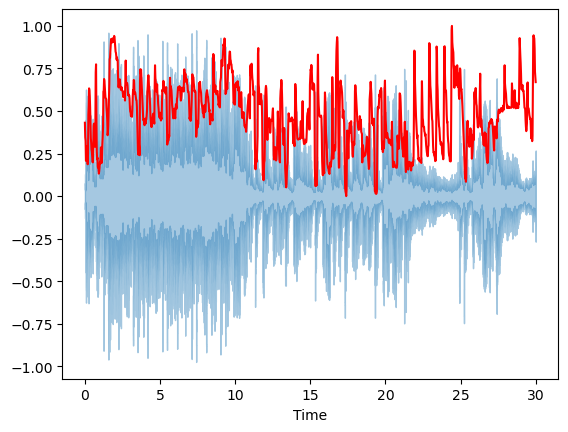

In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=(x+0.01), sr=sr)[0]
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

+ Spectral contrast

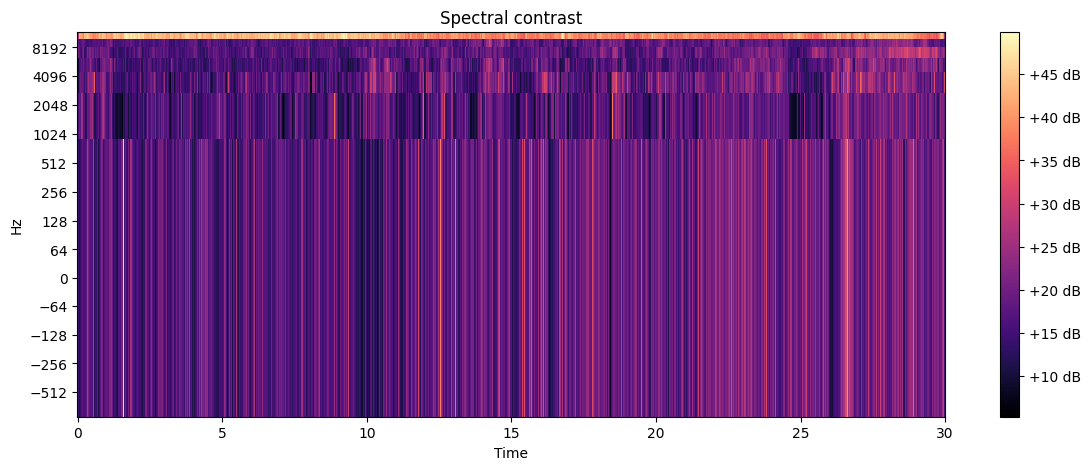

In [ ]:
contrast = librosa.feature.spectral_contrast(y=x, sr=sr, n_bands=6)

plt.figure(figsize=(14, 5))
librosa.display.specshow(contrast, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectral contrast')
plt.show()

+ Spectral flux

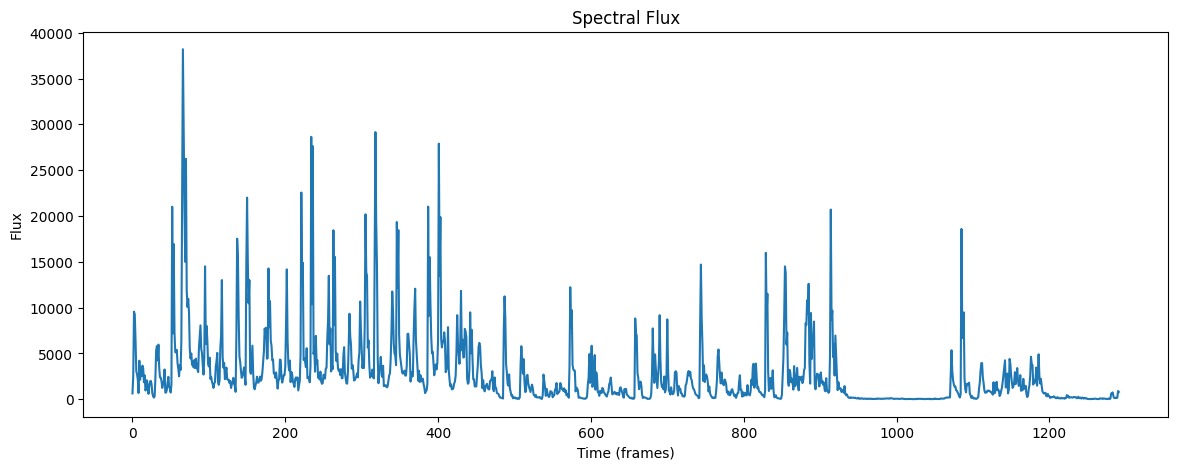

In [ ]:
# STFT
D = np.abs(librosa.stft(x))

flux = np.sum(np.diff(D, axis=1)**2, axis=0)

plt.figure(figsize=(14, 5))
plt.plot(flux)
plt.title('Spectral Flux')
plt.xlabel('Time (frames)')
plt.ylabel('Flux')
plt.show()

+ Mel-Frequency Cepstral Coefficients (MFCCs)

    - = a set of features that concisely describe the overall shape of a spectral envelope

    - it models the characteristics of the human voice

Computed 20 MFCC over 1293 frames 


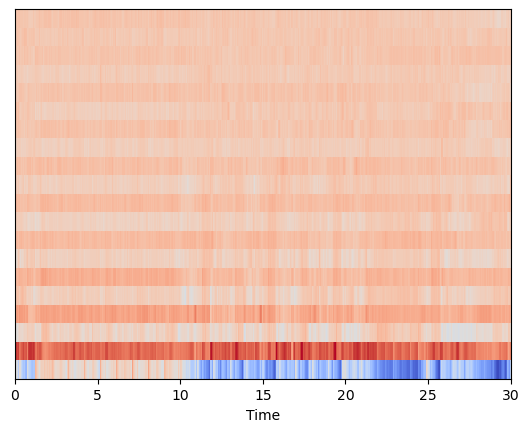

In [ ]:
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(f'Computed {mfccs.shape[0]} MFCC over {mfccs.shape[1]} frames ')

# Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

[-0.04389665  0.00700875 -0.02859716 -0.02201531 -0.03194601 -0.03473914
  0.01864888 -0.05872967  0.06591769 -0.03110351  0.01591796  0.04928809
 -0.01502545 -0.01880562  0.02121673 -0.08257779 -0.02494955 -0.00844274
 -0.0215904  -0.05386829]
[0.41528642 0.5162852  0.508536   0.5734191  0.552946   0.5267624
 0.53057647 0.55760026 0.5676201  0.5101976  0.46457413 0.46643794
 0.48303828 0.49822795 0.4347275  0.59307617 0.50109494 0.4344442
 0.5152771  0.49618703]


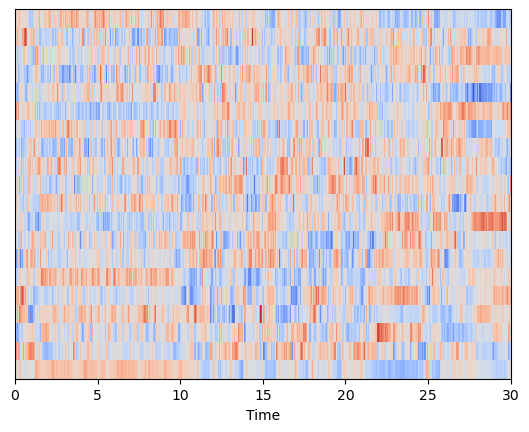

In [ ]:
# Feature scaling such that each coefficient dimension has 
#           zero mean and unit variance

mfccs = preprocessing.robust_scale(mfccs, axis=1)

print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

librosa.display.specshow(mfccs, sr=sr, x_axis='time')

+ Chroma Frequencies

    - representation for audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (chroma) of the musical octave

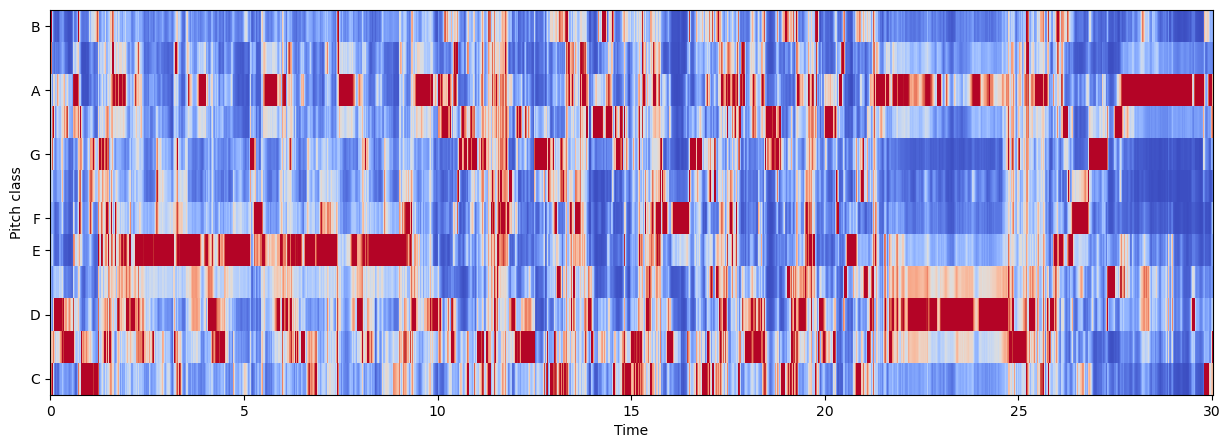

In [ ]:
chromagram = librosa.feature.chroma_stft(y=x, sr=sr)

plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')

+ Tempo BMP (beats per minute)

    - = numerical way of representing the tempo of audio

In [ ]:
tempo, beat_frames = librosa.beat.beat_track(y=x, sr=sr)

print(f'Tempo (BPM): {tempo}')

Tempo (BPM): 123.046875


+ Harmonics and Perceptrual

    - harmonics = pitch sounds that enable us to hear melodies

    - percussive sounds = something originating from an instrument onset, like a beat on a drum

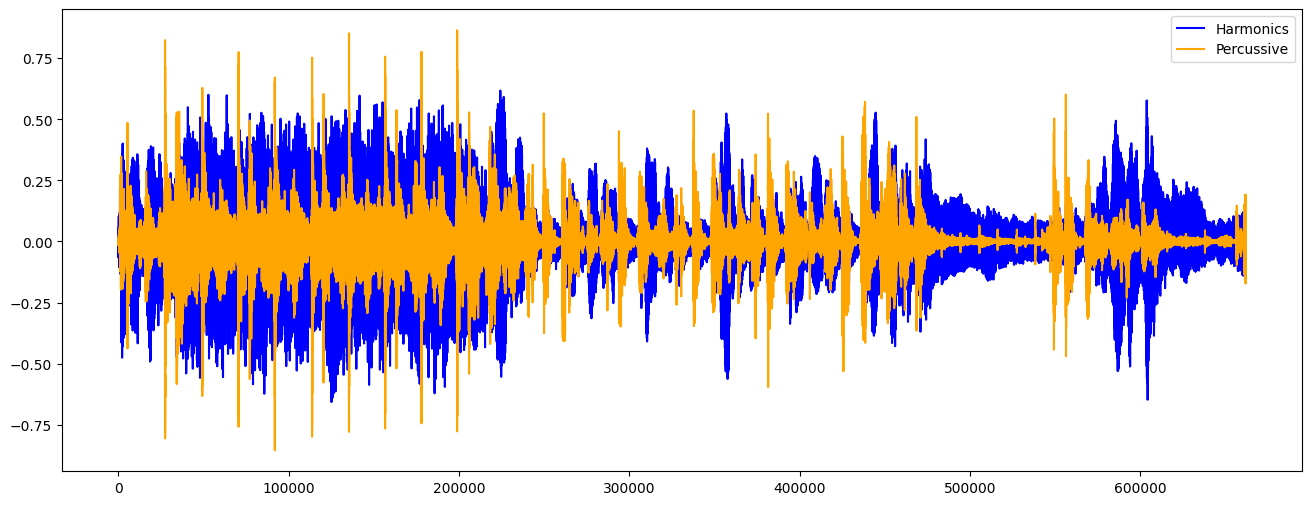

In [ ]:
harmonics, percussive = librosa.effects.hpss(y=x)

plt.figure(figsize=(16, 6))
plt.plot(harmonics, color='blue', label='Harmonics')
plt.plot(percussive, color='orange', label='Percussive')

plt.legend()
plt.show()

### **Exploratory Data Analysis**

In [ ]:
dataset_3sec = pd.read_csv('./features_3_sec.csv')
dataset_3sec.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  

[5 rows x 60 columns]

In [ ]:
dataset_30sec = pd.read_csv('./features_30_sec.csv')
dataset_30sec.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

#### Correlation Heatmap 

It displays the magnitude and direction (positive or negative) of the relationship between variables as a correlation coefficient.

- Strength of correlation: The magnitude of the correlation coefficient indicates the strength of the relationship between two variables. The closer the coefficient is to +1 or -1, the stronger the correlation.

- Sign of correlation: The sign of the correlation coefficient indicates the direction of the relationship between two variables. A positive coefficient indicates a positive relationship (when one variable increases, the other variable also increases), while a negative coefficient indicates a negative relationship (when one variable increases, the other variable decreases).

- Causation: A correlation between two variables does not imply causation. It only indicates a statistical relationship between two variables. Further investigation is needed to determine if one variable is causing the other.

Useful for:

- Visual representation:  easier to understand and interpret the relationships between variables, especially when dealing with a large number of them.

- Identifying relationships: highlights the variables that are highly correlated with each other and those that have little or no correlation.

- Feature selection: by identifying the variables that are highly correlated with the target variable, one can choose the most important variables for the model, reducing the risk of overfitting and improving model performance.

- Data cleaning: identify and remove redundant or unnecessary variables, which can improve the accuracy of the analysis and the interpretability of the results.

- Hypothesis testing:  generate hypotheses about the relationships between variables, hypotheses that can then be tested further through statistical analysis.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5]),
 [Text(0, 0.5, 'chroma_stft_mean'),
  Text(0, 1.5, 'rms_mean'),
  Text(0, 2.5, 'spectral_centroid_mean'),
  Text(0, 3.5, 'spectral_bandwidth_mean'),
  Text(0, 4.5, 'rolloff_mean'),
  Text(0, 5.5, 'zero_crossing_rate_mean'),
  Text(0, 6.5, 'harmony_mean'),
  Text(0, 7.5, 'perceptr_mean'),
  Text(0, 8.5, 'tempo'),
  Text(0, 9.5, 'mfcc1_mean'),
  Text(0, 10.5, 'mfcc2_mean'),
  Text(0, 11.5, 'mfcc3_mean'),
  Text(0, 12.5, 'mfcc4_mean'),
  Text(0, 13.5, 'mfcc5_mean'),
  Text(0, 14.5, 'mfcc6_mean'),
  Text(0, 15.5, 'mfcc7_mean'),
  Text(0, 16.5, 'mfcc8_mean'),
  Text(0, 17.5, 'mfcc9_mean'),
  Text(0, 18.5, 'mfcc10_mean'),
  Text(0, 19.5, 'mfcc11_mean'),
  Text(0, 20.5, 'mfcc12_mean'),
  Text(0, 21.5, 'mfcc13_mean'),
  Text(0, 22.5, 'mfcc14_mean'),
  Text(0, 23.5, 'mfcc15_mean'),
  Text(0, 24.5, 

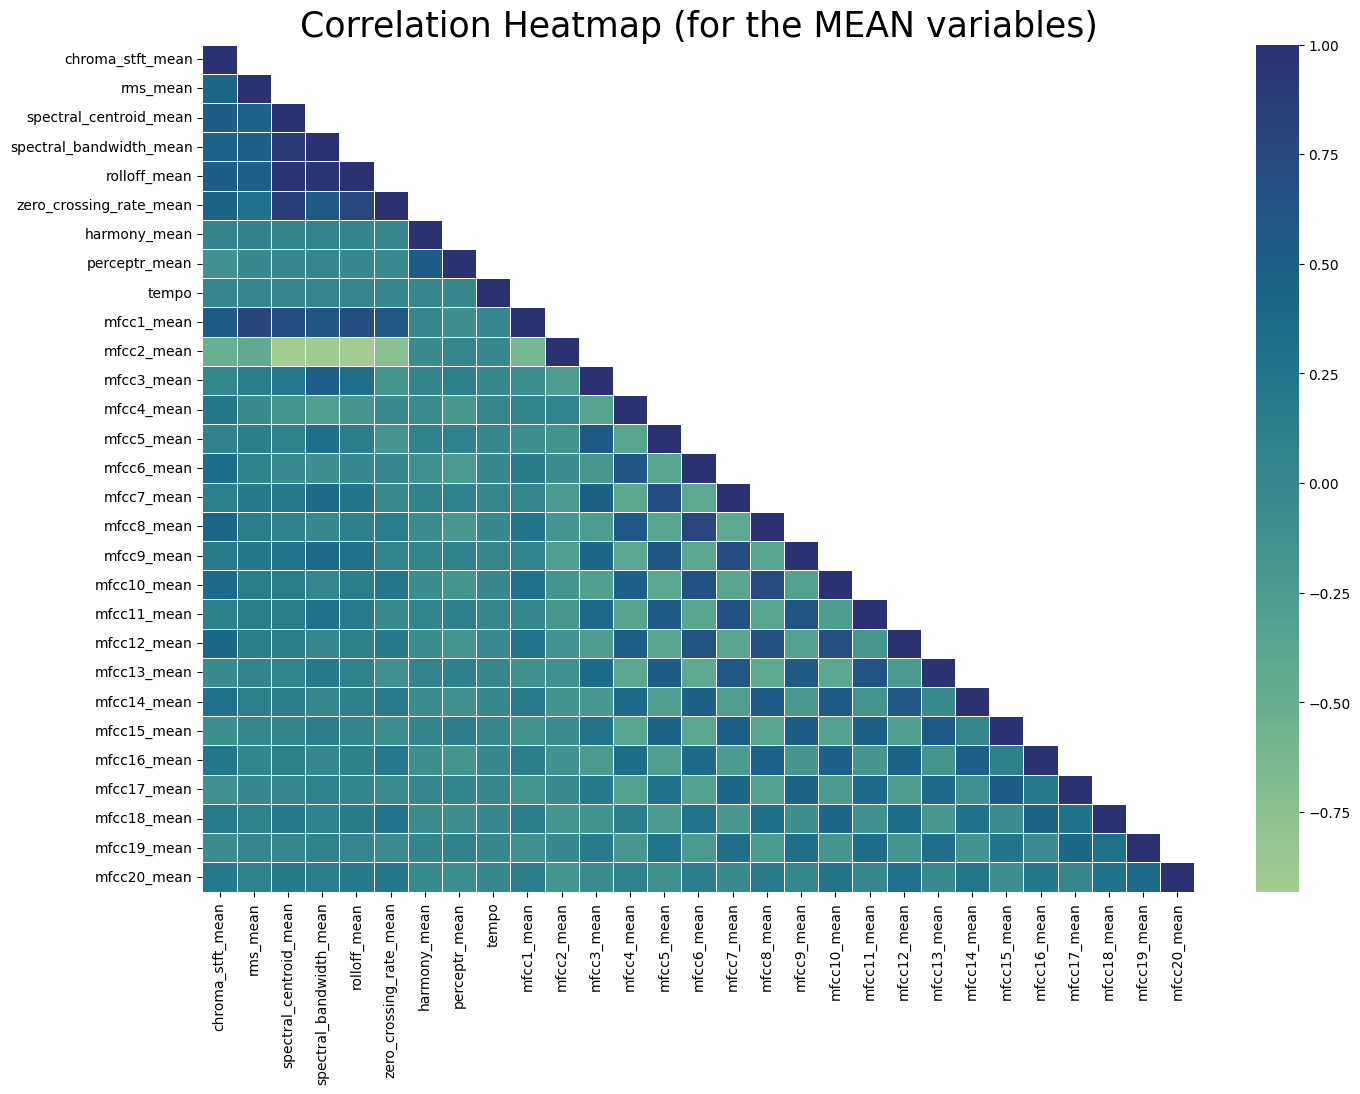

In [ ]:
# Computing the Correlation Matrix
cols = [col for col in dataset_3sec.columns if 'mean' in col or col == 'tempo']
corr = dataset_3sec[cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), 1)

f, ax = plt.subplots(figsize=(16, 11))

sns.heatmap(corr, mask=mask, cmap='crest', linewidths=.5)

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
# plt.savefig("./Images/Correlation Heatmap.jpg")

#### Principal Component Analysis

= a statistical technique that is used to reduce the dimensionality of a data set

It does this by finding the principal components, which are a set of uncorrelated variables that capture the maximum variability in the data. The principal components are linear combinations of the original variables, and they are ordered by the amount of variance they explain in the data.

Useful for:

- Dimensionality reduction: reduce the dimensionality of a data set, which can be especially useful when dealing with high-dimensional data. This can improve the performance of machine learning models, increase the interpretability of the results, and reduce the risk of overfitting.

- Data visualization: visualize complex data sets by projecting the data onto the principal components. This can help to identify patterns and relationships in the data that may not have been apparent in the original variables.

- Data compression: compress the data by retaining only the most important components and discarding the others. This can reduce the storage and computation requirements for large data sets.

- Noise reduction: remove noise from the data by retaining only the components that explain the most variance. This can improve the accuracy and stability of the results.

- Feature extraction: extract new features from the data, which can be used as input variables in machine learning models. This can improve the performance of the models by reducing the dimensionality of the data and eliminating redundant or irrelevant variables.

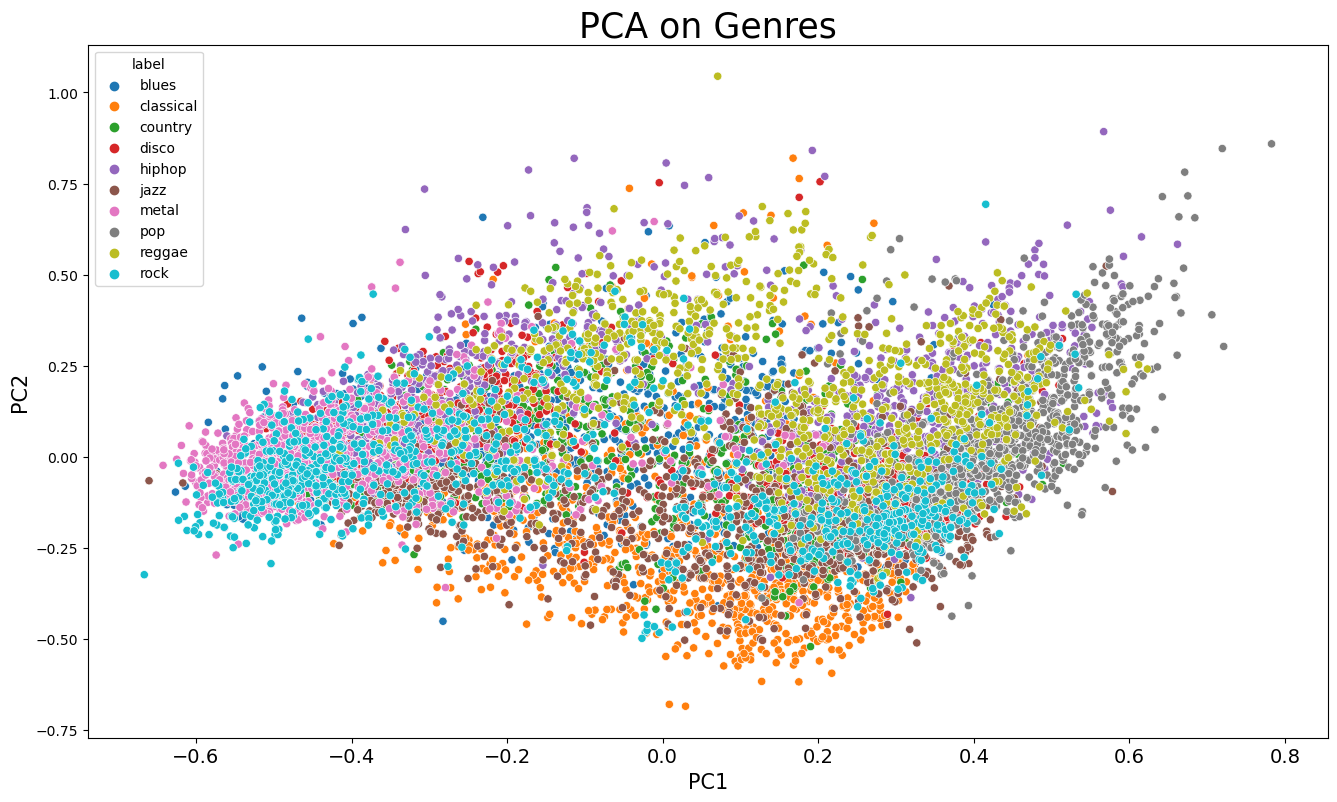

In [ ]:
# Eliminate filename from features
dataset_3sec = dataset_3sec.iloc[0:, 1:]

Y = dataset_3sec['label']
X = dataset_3sec.loc[:, dataset_3sec.columns != 'label']

# Normalize X
cols = X.columns
scaler = MinMaxScaler()
scaled_input = scaler.fit_transform(X)
X = pd.DataFrame(scaled_input, columns=cols)

# PCA 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDataset = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
principalDataset = pd.concat([principalDataset, Y], axis=1)

plt.figure(figsize=(16,9))
sns.scatterplot(x='PC1', y='PC2', data=principalDataset, hue='label')
plt.title('PCA on Genres', fontsize=25)
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.xlabel('PC1', fontsize=15)
plt.ylabel('PC2', fontsize=15)
plt.savefig('PCA scatter.jpg')

### Features scaling / Normalization / Standardization

Ensures that the variables have a similar scale, because it can affect the performance of many machine learning algorithms, especially those that use distance metrics.

It also prevents the outliers from having a disproportionate effect on the results and helps improve the convergence of optimization algorithms.

Choosing a proper scaler:

- StandardScaler: for data with a Gaussian (normal) distribution and no significant outliers. It scales the data to have a mean of zero and a standard deviation of one.

- MinMaxScaler: for data that has a skewed distribution and/or contains outliers. It scales the data to have a range of [0,1].

- RobustScaler: for data with a skewed distribution and/or outliers. It scales the data based on the median and the interquartile range, which makes it more robust to outliers than StandardScaler.

- MaxAbsScaler: for sparse data, where many of the variables have values of zero. It scales the data to have a range of [-1,1].

### Spectrograms for each genre

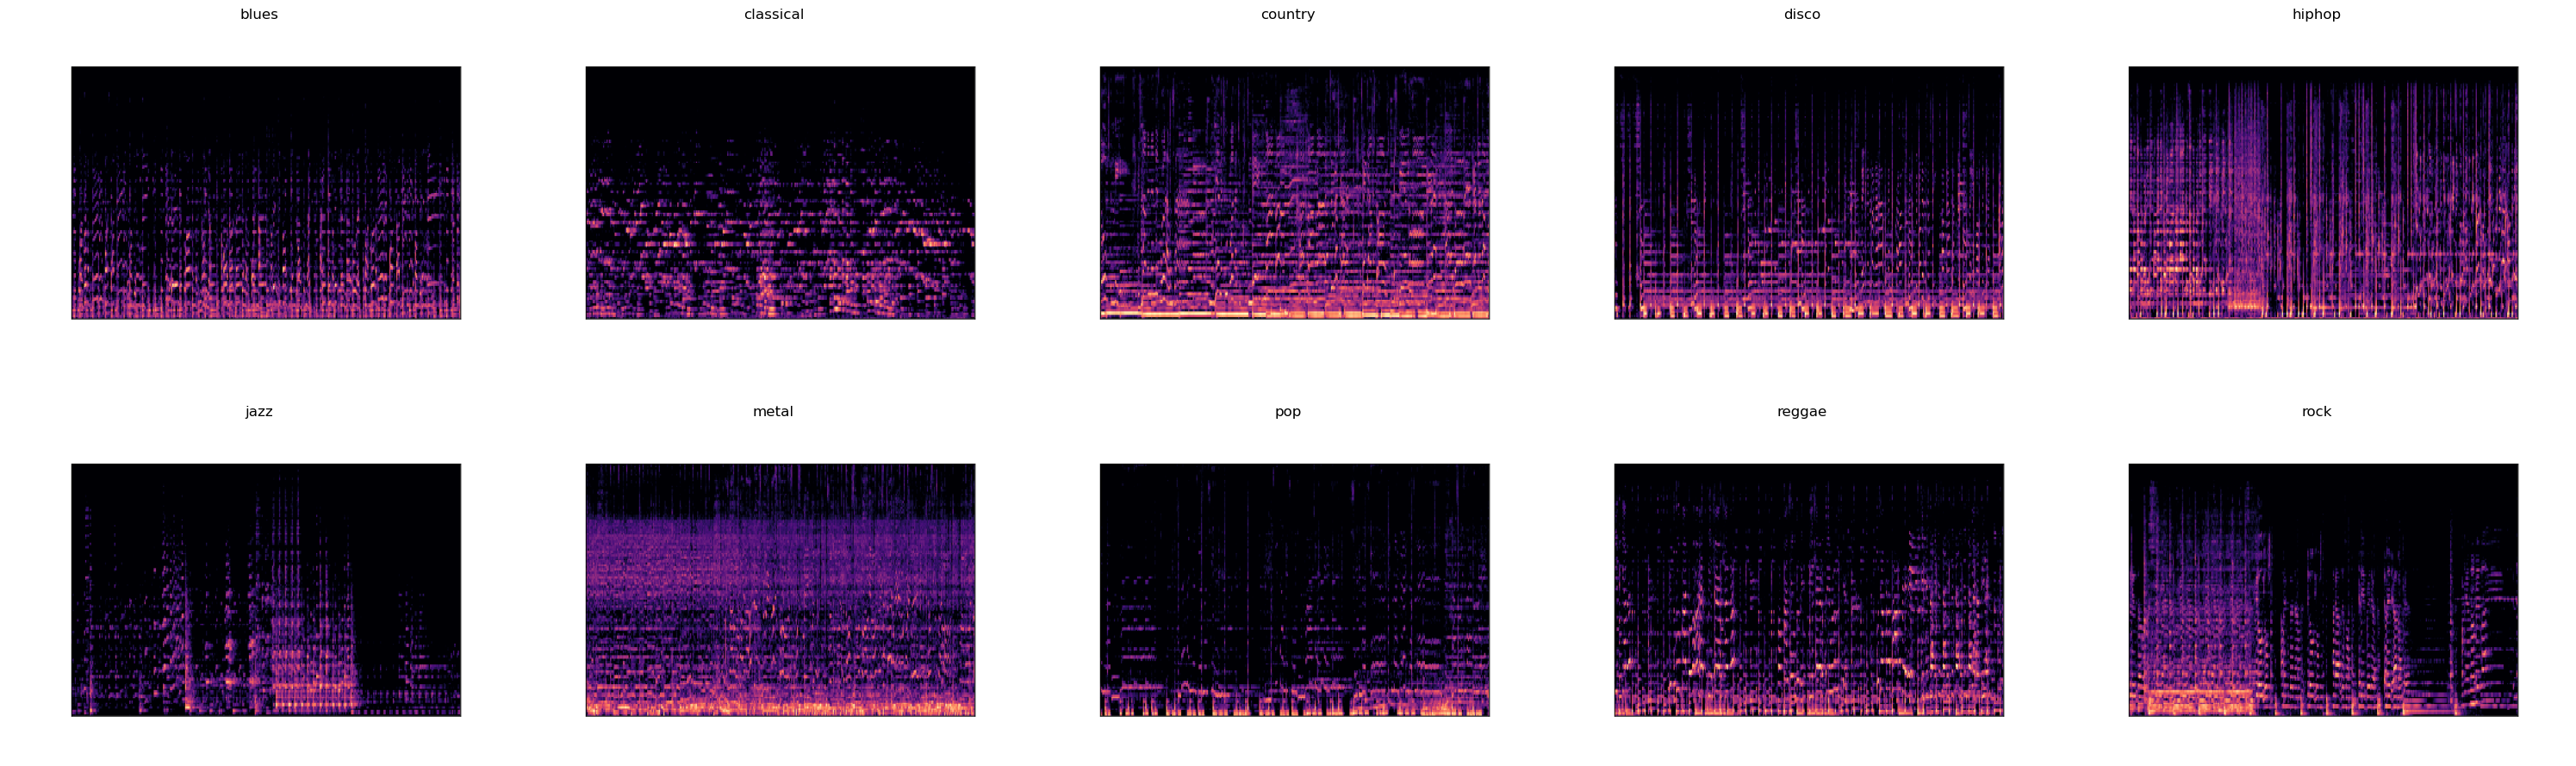

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 5, figsize = (30,10))
ax = ax.ravel()

genres = list(os.listdir('./Data/images_original/'))

for i, ax in enumerate(ax):
    image = cv2.imread(f'./Data/images_original/{genres[i]}/{genres[i]}00000.png')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax.imshow(image)
    ax.set_title(genres[i])
    ax.axis('off')

plt.tight_layout()
plt.show()

##### Images are not on logarithmic scale and their size is 432x288 so we re-do them

In [ ]:
import librosa
import librosa.display
import os
import numpy as np
import matplotlib.pyplot as plt

audio_folder = '.\Data\genres_original'
image_folder = '.\Data\images_new'
genres = list(os.listdir('./Data/genres_original'))

for genre in genres:
    genre_path = os.path.join(audio_folder, genre)
    image_path = os.path.join(image_folder, genre)
    for index, filename in enumerate(list(os.listdir(genre_path))):
        index = '{:03d}'.format(index)
        y, sr = librosa.load(os.path.join(genre_path, filename))
        # print(os.path.join(genre_path, filename), index)
        s = librosa.feature.melspectrogram(y=y, sr=sr)
        s_db = librosa.amplitude_to_db(s, ref=np.max)

        plt.figure(figsize=(2.56, 2.56))
        img = librosa.display.specshow(s_db, sr=sr, y_axis='log')
        plt.axis('off')
        plt.savefig(os.path.join(image_path, genre+index+'.png'))
        plt.close()

c:\ProgramData\Anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


### GTZAN dataset is faulty

(+details why: mislabeling, repetitions, distortions)

+ https://arxiv.org/pdf/1306.1461.pdf